# Practice 1
### MTAT.03.227 Machine learning course 
### 10.09.2018

Today we will solve an eternal problem of cats and dogs classification using simple linear methods.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Optional styling:

In [2]:
plt.style.use('seaborn-whitegrid') # Plot style
import seaborn as sns

## Dataset

Define the dataset about cats and dogs and take a look at it

In [3]:
data = pd.DataFrame({
    'mass':   [4, 5, 5, 5, 6, 7, 11, 11, 13, 13], # in kittygrams 
    'height': [2, 1, 2, 3, 2, 4, 8,  10, 8,  10], # in doggometers
    'label':  ['cat']*5 + ['dog']*5
}, 
    columns = ['mass', 'height', 'label'] # mantains column order
)
data

,mass,height,label
0,4,2,cat
1,5,1,cat
2,5,2,cat
3,5,3,cat
4,6,2,cat
5,7,4,dog
6,11,8,dog
7,11,10,dog
8,13,8,dog
9,13,10,dog


### Plots

It is always useful to plot your data. We will mainly use `matplotlib` for that purpose. 

We will plot the same data again during this session and it is a good practice to wrap up this piece of code into a function

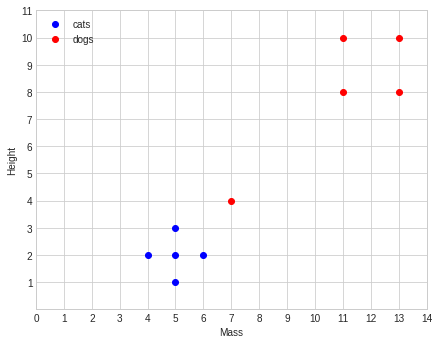

In [4]:
def plot_cats_vs_dogs(data):
    # Specify figure parameters
    fig = plt.figure(figsize=(7, 5.5)) 
    # Data to plot
    plt.plot(data.loc[data.label == 'cat', 'mass'], data.loc[data.label == 'cat', 'height'], 'bo', label='cats') 
    plt.plot(data.loc[data.label == 'dog', 'mass'], data.loc[data.label == 'dog', 'height'], 'ro', label='dogs')

    # Specify legend
    plt.legend(markerscale=1)

    # Specify axes parameters
    plt.xticks(list(range(0, 15)))
    plt.yticks(list(range(1, 12)))
    plt.xlim(0, 14)
    plt.ylim(0, 11)

    # Axis labels
    plt.xlabel('Mass')
    plt.ylabel('Height')

# Show the plot inline
plot_cats_vs_dogs(data)
plt.show()

Or you could also use `seaborn` library if you like, it could be useful for bigger datasets and has many pre-implemented types of plots

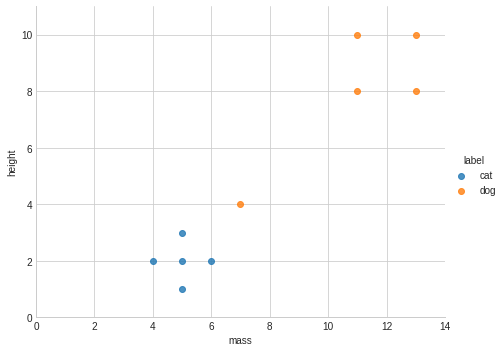

In [5]:
sns.lmplot(data=data,     # set datafrafe
           x='mass',      # set column used for x
           y='height',    # and y
           hue='label',   # specify color
           fit_reg=False, # don't fit any regression
           aspect=1.273
)
plt.xlim(0, 14)
plt.ylim(0, 11)
plt.show()

**Questions:**
1. What you can already say from this plot? Are the data linearly separable?
2. Can we use only one feature (mass or weight) to separate the data?

**Important!** In your homeworks please provide clean plots with sufficient descriptions

## Simple linear classifier

We can draw a separation line using mean height and mass of dogs and cats

The average cat weighs 5.0 kittygrams and 2.0 doggometers tall
The average dog weighs 11.0 kittygrams and 8.0 doggometers tall
The separation plane goes through 8.0 kittygrams and 5.0 doggometers


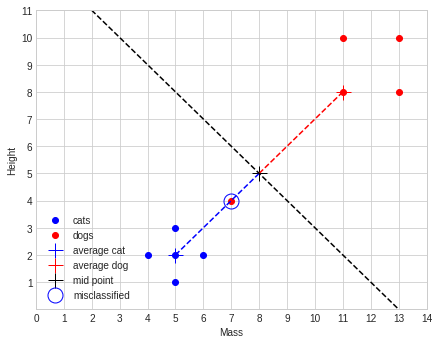

In [6]:
avg_cat = (np.mean(data.loc[data.label == 'cat', 'mass']), np.mean(data.loc[data.label == 'cat', 'height']))
avg_dog = (np.mean(data.loc[data.label == 'dog', 'mass']), np.mean(data.loc[data.label == 'dog', 'height']))
avg_pt = np.mean([avg_cat, avg_dog], axis=0)

print('The average cat weighs {} kittygrams and {} doggometers tall'.format(*avg_cat))
print('The average dog weighs {} kittygrams and {} doggometers tall'.format(*avg_dog))
print('The separation plane goes through {} kittygrams and {} doggometers'.format(*avg_pt))


# Re-use our plot
plot_cats_vs_dogs(data)
plt.plot(*avg_cat, 'b+', markersize=15, label='average cat')
plt.plot(*avg_dog, 'r+', markersize=15, label='average dog')
plt.plot(*avg_pt, 'k+', markersize=15, label='mid point')
plt.plot(*list(zip(avg_cat, avg_pt)), 'b--')
plt.plot(*list(zip(avg_pt, avg_dog)), 'r--')
plt.plot([0, 13], [13, 0], 'k--')

# Misclassified example
plt.plot(7, 4, 'bo', markersize=15, markerfacecolor='none', label='misclassified')

plt.legend()
plt.show()

## Perceptron

Perceptron algorithm could help to overcome this misclassification by iteratively adjusting the separation plane. 

Below you can find not the super-efficient but hopefully understandable implementation of perceptron.

In [7]:
def perceptron(data, w, learning_rate=1):
    all_w = [w[:]]  # Store all the weights
    not_correct = True  # Set termination condition
    
    while not_correct:
        not_correct = False
        
        for i in range(data.shape[0]):  # Loop over all the data points
            
            x = data.loc[i]
            prediction = w[0] + w[1] * x["mass"] + w[2] * x["height"]
            
            # In case of misclassification adjust the weights
            if prediction <= 0 and x["label"] == 'dog':
                w[0] += learning_rate * 1
                w[1] += learning_rate * x["mass"]
                w[2] += learning_rate * x["height"]
                all_w.append(w[:])
                not_correct = True
                
            elif prediction > 0 and x["label"] == 'cat':
                w[0] -= learning_rate * 1
                w[1] -= learning_rate * x["mass"]
                w[2] -= learning_rate * x["height"]
                all_w.append(w[:])
                not_correct = True
                
    return w, all_w

In [8]:
def plot_perceptron_iterations(data, w, learning_rate=1):
    w, all_w = perceptron(data, w, learning_rate)
    plot_cats_vs_dogs(data)

    for i in range(len(all_w) - 1):
        w = all_w[i]
        x = np.linspace(0,15,100)
        y = (-1) * (w[1] / (w[2]+1e-8) * x - w[0] / (w[2]+1e-8)) # this is necessary to change the line formula into a format we can use for plotting
        plt.plot(x, y, color = "grey")

    # plot the final vector
    w = all_w[-1]
    x = np.linspace(0,15,100)
    y = (-1) * (w[1] / w[2]) * x - w[0] / w[2]
    plt.plot(x, y, color = "green")

    plt.show()
    return w, all_w

Play around with different weight initializations

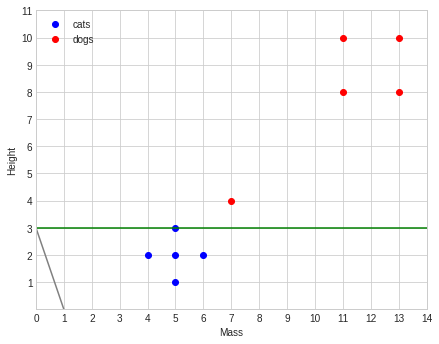

Iterations: 4
Weight vector: [-3, 0, 1]


[[-2, 1, 1], [-3, -3, -1], [-2, 4, 3], [-3, 0, 1]]

In [11]:
w = [-2, 1, 1]
learning_rate = 1

w, all_w = plot_perceptron_iterations(data, w, learning_rate)
print('Iterations:', len(all_w))
print('Weight vector:', w)
all_w

**Quesions:**

1. Is this separation optimal?
2. What happens if we change the initial wector?
3. What happens if we change the learning rate?